In [63]:
import tensorflow
import numpy as np
import pandas as pd 
import os
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter("ignore")
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

In [64]:
os.getcwd()

'C:\\Users\\vijay\\Downloads\\Temp\\Projects\\Stock-Predection\\Stock'

In [65]:
df = pd.read_csv("WIPRO.csv", header = 0)

In [66]:
df

,Date,Symbol,Open,High,Low,Close,Volume
0,03-01-2000,WIPRO,2724.00,2724.20,2724.00,2724.20,1599
1,04-01-2000,WIPRO,2942.15,2942.15,2942.15,2942.15,4392
2,05-01-2000,WIPRO,2942.15,3177.55,2715.00,2990.10,132297
3,06-01-2000,WIPRO,3144.70,3183.00,2790.00,2932.25,72840
4,07-01-2000,WIPRO,2751.00,2751.00,2697.70,2697.70,10110
...,...,...,...,...,...,...,...
5301,26-04-2021,WIPRO,479.40,483.85,477.00,480.30,9314644
5302,27-04-2021,WIPRO,481.40,487.00,481.00,485.05,7209467
5303,28-04-2021,WIPRO,485.85,493.20,481.25,489.30,9615534
5304,29-04-2021,WIPRO,492.70,492.80,485.70,489.85,7641133


In [67]:
df.shape

(5306, 7)

In [69]:
df.Symbol.value_counts()

Symbol
WIPRO    5306
Name: count, dtype: int64

In [70]:
df.Date.value_counts()

Date
03-01-2000    1
10-03-2014    1
06-03-2014    1
05-03-2014    1
04-03-2014    1
             ..
16-01-2007    1
15-01-2007    1
12-01-2007    1
11-01-2007    1
30-04-2021    1
Name: count, Length: 5306, dtype: int64

In [71]:
df.Symbol.unique()[0:20]

array(['WIPRO'], dtype=object)

In [72]:
len(df.Symbol.values)

5306

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5306 entries, 0 to 5305
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    5306 non-null   object 
 1   Symbol  5306 non-null   object 
 2   Open    5306 non-null   float64
 3   High    5306 non-null   float64
 4   Low     5306 non-null   float64
 5   Close   5306 non-null   float64
 6   Volume  5306 non-null   int64  
dtypes: float64(4), int64(1), object(2)
memory usage: 290.3+ KB


In [74]:
df.describe()

,Open,High,Low,Close,Volume
count,5306.000000,5306.000000,5306.000000,5306.000000,5.306000e+03
mean,756.799981,772.478364,738.150886,754.474783,2.236123e+06
std,803.371567,825.259513,768.613272,794.159260,4.827183e+06
min,163.100000,171.350000,159.400000,162.350000,1.003000e+03
25%,380.575000,386.900000,374.475000,380.525000,6.937025e+05
50%,504.000000,510.800000,494.500000,503.250000,1.152270e+06
75%,680.000000,690.887500,670.812500,678.687500,2.004576e+06
max,10350.000000,10350.000000,8928.350000,9587.450000,1.303677e+08


In [75]:
df.isnull().sum()

Date      0
Symbol    0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [76]:
df.duplicated().sum()

0

In [77]:
stocks = np.array(df[df.Symbol.isin(['WIPRO'])].Close)
stocks

array([2724.2 , 2942.15, 2990.1 , ...,  489.3 ,  489.85,  492.75])

In [78]:
stocks.shape

(5306,)

In [79]:
stocks = stocks.reshape(len(stocks), 1)
display(stocks.shape)
stocks

(5306, 1)

array([[2724.2 ],
       [2942.15],
       [2990.1 ],
       ...,
       [ 489.3 ],
       [ 489.85],
       [ 492.75]])

In [80]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0, 10))

stocks = scaler.fit_transform(stocks)
stocks

array([[2.7181144 ],
       [2.94935863],
       [3.00023342],
       ...,
       [0.34689287],
       [0.34747642],
       [0.35055331]])

In [81]:
stocks.shape

(5306, 1)

In [82]:
train = int(len(stocks) * 0.80)
train

4244

In [83]:
test = len(stocks) - train
test

1062

In [84]:
train = stocks[0:train]
display(train.shape)
train

(4244, 1)

array([[2.7181144 ],
       [2.94935863],
       [3.00023342],
       ...,
       [0.33331211],
       [0.33299381],
       [0.34042079]])

In [85]:
test = stocks[len(train) : ]
display(test.shape)
test

(1062, 1)

array([[0.34195924],
       [0.34206534],
       [0.33957199],
       ...,
       [0.34689287],
       [0.34747642],
       [0.35055331]])

In [86]:
def process_data(data, n_features):
    dataX, dataY = [], []
    for i in range(len(data) - n_features):
        a = data[i : (i + n_features), 0]
        dataX.append(a)
        dataY.append(data[i + n_features, 0])
    return np.array(dataX), np.array(dataY)

In [87]:
n_features = 2
trainX, trainY = process_data(train, n_features)
print(trainX.shape, trainY.shape)

(4242, 2) (4242,)


In [88]:
testX, testY = process_data(test, n_features)
print(testX.shape, testY.shape)

(1060, 2) (1060,)


In [89]:
stocksX, stocksY = process_data(stocks, n_features)
print(stocksX.shape, stocksY.shape)

(5304, 2) (5304,)


In [90]:
trainX = trainX.reshape(trainX.shape[0], 1, trainX.shape[1])
trainX

array([[[2.7181144 , 2.94935863]],

       [[2.94935863, 3.00023342]],

       [[3.00023342, 2.93885476]],

       ...,

       [[0.32636259, 0.32853763]],

       [[0.32853763, 0.33331211]],

       [[0.33331211, 0.33299381]]])

In [91]:
trainX.shape

(4242, 1, 2)

In [92]:
testX = testX.reshape(testX.shape[0], 1, testX.shape[1])
stocksX = stocksX.reshape(stocksX.shape[0], 1, stocksX.shape[1])
testX.shape

(1060, 1, 2)

In [93]:
stocks.shape

(5306, 1)

In [94]:
import math
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, Dropout, Activation
from keras.layers import LSTM, GRU
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.optimizers import Adam, SGD, RMSprop

In [95]:
filepath = "stock_weights1.hdf5"
from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint

In [96]:
lr_reduce = ReduceLROnPlateau(monitor = 'val_loss', factor = 0.1, patience = 5, min_lr = 0.00001, verbose = 1)
checkpoint = ModelCheckpoint(filepath, monitor = 'val_loss', verbose = 1, save_best_only = True, mode = 'max')

In [97]:
model = Sequential()
model.add(GRU(256, input_shape = (1, n_features), return_sequences = True))
model.add(Dropout(0.4))
model.add(LSTM(256, return_sequences = True))
model.add(Dropout(0.4))
model.add(LSTM(256))
model.add(Dropout(0.4))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(1))

In [98]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_2 (GRU)                 (None, 1, 256)            199680    
                                                                 
 dropout_6 (Dropout)         (None, 1, 256)            0         
                                                                 
 lstm_4 (LSTM)               (None, 1, 256)            525312    
                                                                 
 dropout_7 (Dropout)         (None, 1, 256)            0         
                                                                 
 lstm_5 (LSTM)               (None, 256)               525312    
                                                                 
 dropout_8 (Dropout)         (None, 256)               0         
                                                                 
 dense_4 (Dense)             (None, 64)               

In [99]:
model.compile(loss = 'mean_squared_error', optimizer = Adam(lr = 0.0001), metrics = ['mean_squared_error'])

In [100]:
history = model.fit(trainX, trainY, epochs = 64, batch_size = 64, callbacks = [checkpoint, lr_reduce], validation_data = (testX, testY))

Epoch 1/64
65/67 [============================>.] - ETA: 0s - loss: 1.2369 - mean_squared_error: 1.2369
Epoch 1: val_loss improved from -inf to 0.00703, saving model to stock_weights1.hdf5
67/67 [==============================] - 20s 83ms/step - loss: 1.2232 - mean_squared_error: 1.2232 - val_loss: 0.0070 - val_mean_squared_error: 0.0070 - lr: 1.0000e-04
Epoch 2/64
64/67 [===========================>..] - ETA: 0s - loss: 0.3651 - mean_squared_error: 0.3651
Epoch 2: val_loss improved from 0.00703 to 0.05859, saving model to stock_weights1.hdf5
67/67 [==============================] - 2s 32ms/step - loss: 0.3542 - mean_squared_error: 0.3542 - val_loss: 0.0586 - val_mean_squared_error: 0.0586 - lr: 1.0000e-04
Epoch 3/64
66/67 [============================>.] - ETA: 0s - loss: 0.0423 - mean_squared_error: 0.0423
Epoch 3: val_loss did not improve from 0.05859
67/67 [==============================] - 2s 23ms/step - loss: 0.0422 - mean_squared_error: 0.0422 - val_loss: 0.0202 - val_mean_squar

In [103]:
test_pred = model.predict(testX)
display(test_pred[:10])

34/34 [==============================] - 0s 6ms/step


array([[0.34945336],
       [0.34817708],
       [0.34769487],
       [0.345679  ],
       [0.34374198],
       [0.34440294],
       [0.3459979 ],
       [0.34224284],
       [0.33510184],
       [0.33248717]], dtype=float32)

In [104]:
test_pred = scaler.inverse_transform(test_pred)
display(test_pred[:10])

array([[491.7133 ],
       [490.5104 ],
       [490.0559 ],
       [488.1559 ],
       [486.33026],
       [486.95322],
       [488.45648],
       [484.91733],
       [478.18686],
       [475.7225 ]], dtype=float32)

In [105]:
testY = testY.reshape(testY.shape[0], 1)
testY = scaler.inverse_transform(testY)
display(testY[:10])

array([[482.4 ],
       [482.95],
       [479.  ],
       [477.9 ],
       [479.75],
       [481.5 ],
       [473.7 ],
       [465.55],
       [465.75],
       [458.  ]])

In [131]:
from sklearn.metrics import r2_score
r2_score(testY, test_pred)


0.7413300274814386

Red - Predicted Stock Prices, Blue - Actual Stock Prices


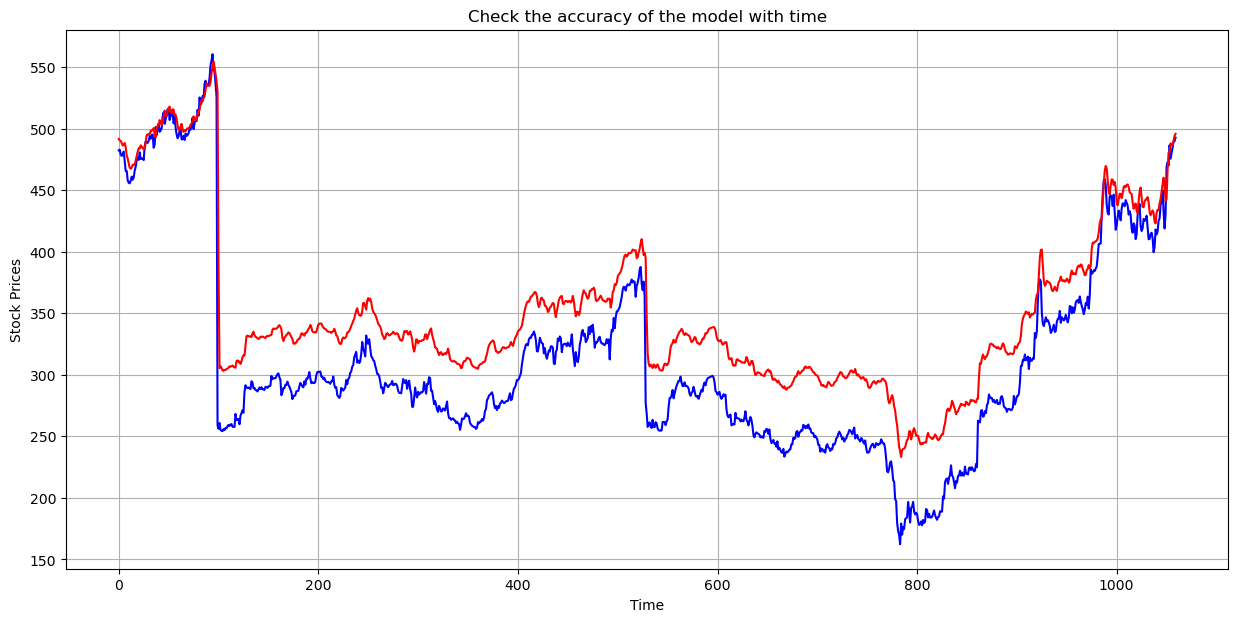

In [107]:
print("Red - Predicted Stock Prices, Blue - Actual Stock Prices")
plt.rcParams["figure.figsize"] = (15, 7)
plt.plot(testY, 'b', label = 'Actual Price')
plt.plot(test_pred, 'r', label = 'Predicated Price')
plt.xlabel('Time')
plt.ylabel('Stock Prices')
plt.title('Check the accuracy of the model with time')
plt.grid(True)
plt.show()

In [108]:
train_pred = model.predict(trainX)
train_pred = scaler.inverse_transform(train_pred)
trainY = trainY.reshape(trainY.shape[0], 1)
trainY = scaler.inverse_transform(trainY)
print('Display Accuracy Training Data')
display(r2_score(trainY, train_pred))

133/133 [==============================] - 1s 6ms/step
Display Accuracy Training Data


0.9900968837256939

Red - Predicted Stock Prices, Blue - Actual Stock Prices


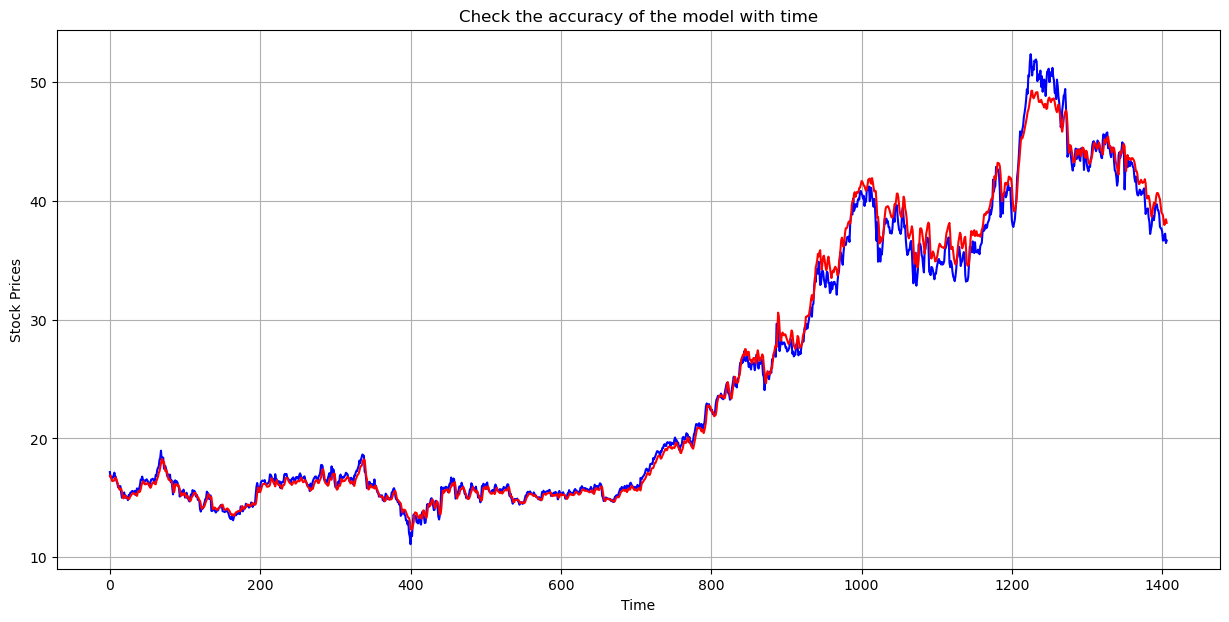

In [201]:
print("Red - Predicted Stock Prices, Blue - Actual Stock Prices")
plt.rcParams["figure.figsize"] = (15, 7)
plt.plot(trainY, 'b')
plt.plot(train_pred, 'r')
plt.xlabel('Time')
plt.ylabel('Stock Prices')
plt.title('Check the accuracy of the model with time')
plt.grid(True)
plt.show()

In [109]:
stocks_pred = model.predict(stocksX)
stocks_pred = scaler.inverse_transform(stocks_pred)
stocksY = stocksY.reshape(stocksY.shape[0], 1)
stocksY = scaler.inverse_transform(stocksY)
print('Display Accuracy Training Data')
display(r2_score(stocksY, stocks_pred))

166/166 [==============================] - 1s 6ms/step
Display Accuracy Training Data


0.9903204607082952

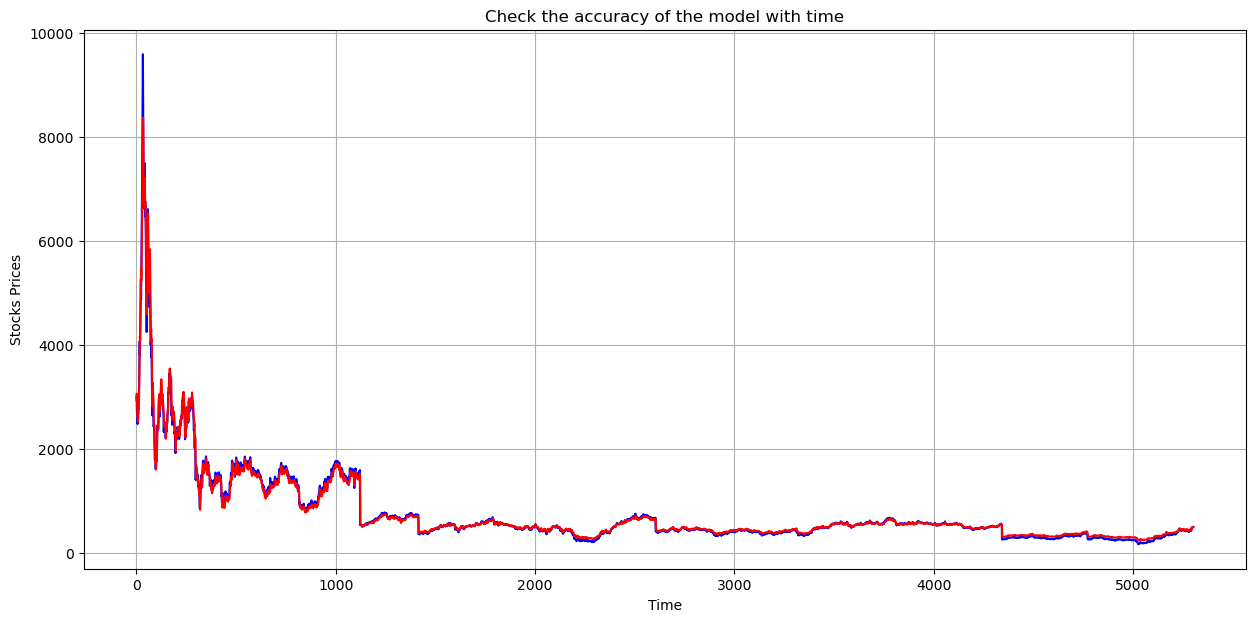

In [110]:
plt.rcParams['figure.figsize'] = (15, 7)
plt.plot(stocksY, 'b')
plt.plot(stocks_pred, 'r')
plt.xlabel('Time')
plt.ylabel('Stocks Prices')
plt.title('Check the accuracy of the model with time')
plt.grid(True)
plt.show()

In [115]:
results = df[df.Symbol.isin(['WIPRO'])]
results = results[2:]
results = results.reset_index(drop = True)
df_stocks_pred = pd.DataFrame(stocks_pred, columns = ['Close_Prediction'])
results = pd.concat([results, df_stocks_pred], axis = 1)
display(results)

,Date,Symbol,Open,High,Low,Close,Volume,Close_Prediction
0,05-01-2000,WIPRO,2942.15,3177.55,2715.00,2990.10,132297,2935.289795
1,06-01-2000,WIPRO,3144.70,3183.00,2790.00,2932.25,72840,3056.916748
2,07-01-2000,WIPRO,2751.00,2751.00,2697.70,2697.70,10110,3033.146240
3,10-01-2000,WIPRO,2697.70,2913.50,2612.00,2701.35,40382,2838.012939
4,11-01-2000,WIPRO,2734.00,2789.00,2485.25,2485.45,46178,2748.299316
...,...,...,...,...,...,...,...,...
5299,26-04-2021,WIPRO,479.40,483.85,477.00,480.30,9314644,487.593567
5300,27-04-2021,WIPRO,481.40,487.00,481.00,485.05,7209467,486.546478
5301,28-04-2021,WIPRO,485.85,493.20,481.25,489.30,9615534,490.494537
5302,29-04-2021,WIPRO,492.70,492.80,485.70,489.85,7641133,494.231720


In [116]:
results.to_csv('result.csv')